**Nama: RICHARDO UMBU SIWA DJURUMANNA SUYATNO**
<br>
**Nim: 21.11.4380**


## Week 10- Metric Evaluation



Evaluasi model, digunakan untuk mengetahui  algoritma yang paling bagus berdasarkan dataset yang kita berikan untuk menyelesaikan masalah tertentu. Dalam istilah machine learning, disebut **Best Fit**. Evaluasi ini digunakan untuk mengukur kinerja berbagai model machine learning, berdasarkan kumpulan data masukan yang sama. Metode evaluasi berfokus pada akurasi model, dalam memprediksi hasil akhir.

Untuk mengevaluasi kinerja model Machine Learning, ada beberapa Metrik untuk mengetahui kinerjanya dan diterapkan untuk algoritma Regresi dan Klasifikasi. Berbagai jenis metrik klasifikasi adalah:


1.   Confusion Matrix   
2.   Classification Accuracy
3.   Precision
4.   Recall
5.   Specificity
6.   F1- Score
7.   Precision-Recall or PR curve
8.   ROC (Receiver Operating Characteristics) curve
4.   Area under Curve (AUC)


Confusion matrix



<img src="https://drive.google.com/uc?id=1ekrnyxkbLkbvbJdScha8cqH2V7EnFl8P" />








In [ ]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Load dataset into dataframe
df_breast_cancer = pd.DataFrame(data=diabetes_data.data,
                                columns= diabetes_data.feature_names)

df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=24)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (455, 30), (455,)
Test Data: (114, 30), (114,)


In [ ]:
# Create model Classifier
classifier = GaussianNB()
# Training the Naive Bayes model on the Training set
classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict data using test data
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
print(cm)

[[37  4]
 [ 5 68]]


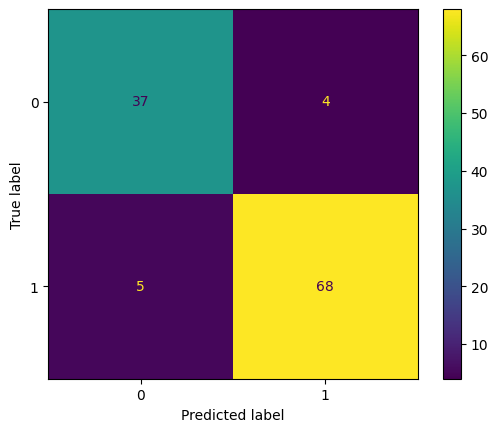

In [ ]:
#confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)

disp.plot()
plt.show()

### 1. Accuracy
Accuracy merupakan Metrik yang paling umum digunakan untuk menilai model dan sebenarnya **bukan** merupakan indikator kinerja yang jelas. Dan tidak akan representatif jika datanya adalah **imbalanced** dataset.

<img src="https://drive.google.com/uc?id=163_SzaLAawoEbl1Rx99U48SuUnpeLsLI">

In [ ]:
TP = 68  # True Positives
TN = 37 # True Negatives
FP = 4  # False Positives
FN = 5 # False Negatives

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.9210526315789473


### 2. Precision
Precision merupakan Perbandingan **True positive** dari banyaknya data yang **diprediksi positif**

<img src="https://drive.google.com/uc?id=1jKyX8D1CdcQH9rZrRN-wIYUI0s1VJKBz">


In [ ]:
TP = 68  # True Positives
TN = 37 # True Negatives
FP = 4  # False Positives
FN = 5 # False Negatives

presicion = (TP) / (TP + FP)
print("Precision :",presicion)

Precision : 0.9444444444444444


### 3.  Recall/Sensitivity/True Positive Rate
Recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Dengan recall kita akan mengetahui prosentase  paseien yang diprediksi terkena cancer dibandingkan keseluruhan data pasien yang sebenarnya terkena cancer”.

<img src="https://drive.google.com/uc?id=1lqnEjszbZcxfwXTrueBoqa_WF5mgX_lt">

In [ ]:
TP = 68  # True Positives
TN = 37 # True Negatives
FP = 4  # False Positives
FN = 5 # False Negatives

recall = (TP) / (TP + FN)
print("Recall :",recall)

Recall : 0.9315068493150684


### 4. Specificity
Merupakan perbandingan True Negative terhadap keseluruhan data negatif. Ini mirip dengan recall tetapi perspektifnya pada data kelas negative. Seperti mencari tahu berapa banyak pasien **sehat yang tidak mengidap kanker dan diprediksi bahwa mereka tidak mengidap kanker**. Semacam ukuran untuk melihat seberapa terpisah kelas-kelas itu.

<img src="https://drive.google.com/uc?id=1n2qRnRbXOI4laNinh_jGeXb5xuOqZsIU">


In [ ]:
#hitung specificity dengan menggunakan persamaan tersebut
TP = 68  # True Positives
TN = 37 # True Negatives
FP = 4  # False Positives
FN = 5 # False Negatives

specificity = (TN) / (TP + FP)
print("spesificity :", specificity)

spesificity : 0.5138888888888888


### 5. F1 Score
Ini adalah rata-rata Precision dan recall yang harmonis. Ini mengambil kontribusi keduanya, jadi semakin tinggi skor F1 semakin baik. digunakan untuk mengukur performa data imbalance

<img src="https://drive.google.com/uc?id=1r_dR5nzmu2KnATDAIehoxtlKFpqkkD-s">

In [ ]:
#hitung nilai f1 score dengan menggunakan persamaan tersebut
TP = 68  # True Positives
TN = 37 # True Negatives
FP = 4  # False Positives
FN = 5 # False Negatives
# Calculate Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = (2 * precision * recall) / (precision + recall)

print("F1-score: ", f1_score)


F1-score:  0.9379310344827586


In [ ]:
from sklearn.metrics import classification_report

# Contoh label sebenarnya dan prediksi
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1]

# Mendapatkan classification report
report = classification_report(y_true, y_pred)

# Menampilkan classification report
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [ ]:
# Menampilkan classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.94      0.93      0.94        73

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
# Jalankan kode berikut
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.9444444444444444


Hasil Precision Score yang di peroleh adalah sekitar 0.9444. Precision mengukur sejauh mana model berhasil mengidentifikasi positif dengan benar dari semua prediksi yang diklasifikasikan sebagai positif. Dengan nilai Precision yang tinggi seperti ini, dapat diartikan bahwa sebagian besar dari yang diprediksi sebagai positif oleh model memang benar-benar positif.

more info about metric in scikit learn you can access in: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Importing all necessary libraries
from imblearn.metrics import specificity_score
# Calculating the Specifity score of classifier
print(f"Specificity Score of the classifier is: {specificity_score(y_test, predictions)}")

Specificity Score of the classifier is: 0.9024390243902439


Hasil Specificity Score yang di peroleh adalah sekitar 0.9024. Specificity mengukur sejauh mana model berhasil mengidentifikasi negatif dengan benar dari semua instansi yang sebenarnya negatif. Dengan nilai Specificity yang tinggi seperti ini, dapat diartikan bahwa sebagian besar dari yang sebenarnya negatif berhasil diidentifikasi dengan benar oleh model.

### 6.ROC-AUC
ROC merupakan singkatan dari (Receiver Operating Characteristic)dan digambarkan dalam grafik dari nilai TPR dan FPR.ROC adalah Metrik Evaluasi yang banyak digunakan, terutama digunakan untuk Klasifikasi **Biner**. True Positive Rate(TPR) dan False Positive Rate(FPR) memiliki nilai mulai dari 0 hingga 1. TPR dan FPR dihitung dengan nilai Treshold yang berbeda2 dan grafik digambar untuk lebih memahami tentang data. ROC adalah kurva probabilitas dan AUC mewakili derajat atau ukuran keterpisahan. Ini memberi tahu berapa banyak model yang mampu membedakan antar kelas. Dengan demikian, Area Di Bawah Kurva adalah plot antara False Positive Rate(FPR) dan True Positive rate pada nilai [0,1] yang berbeda.
ROC AUC hanyalah area di bawah kurva, semakin tinggi nilai numeriknya semakin baik.

<img src="https://drive.google.com/uc?id=1ygO91zLLtLX1cki7o5v7iz8OVKK9WlkJ">

AUC for our classifier is: 0.9839625793518209


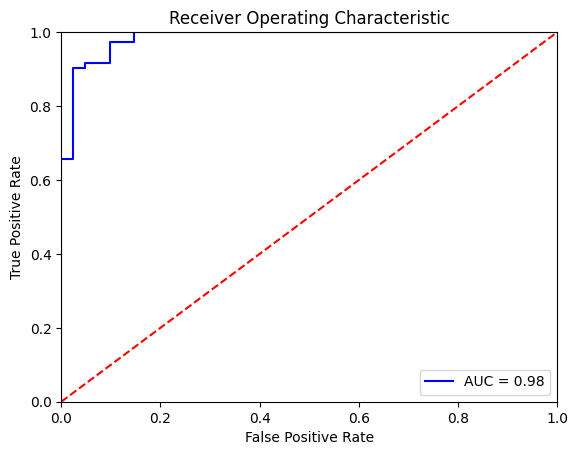

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc
class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
threshold

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99993718e-01, 9.99634716e-01,
       9.99501955e-01, 9.60613177e-01, 4.21242120e-04, 1.07224675e-05,
       3.16890382e-08, 0.00000000e+00])

The optimal cut off would be where **tpr is high and fpr is low**
**tpr - (1-fpr)** is **zero** or near to zero is **the optimal cut off point**

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.9999937180182377


In [ ]:
#dengan menggunakan data train dan data test tersebut,
#buatlah model baru dengan menggunakan algoritma decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

predictions_dt = decision_tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f"Accuracy of Decision Tree model: {accuracy_dt}")

print("Classification Report:")
print(classification_report(y_test, predictions_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_dt))

Accuracy of Decision Tree model: 0.9298245614035088
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.93      0.96      0.95        73

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[36  5]
 [ 3 70]]


    Classification Report: Menyediakan informasi terperinci tentang precision, recall, dan F1-score untuk setiap kelas, serta nilai rata-rata mikro, rata-rata makro, dan rata-rata berponderasi.

    Confusion Matrix: Menunjukkan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).

    Akurasi (Accuracy): Merupakan persentase total prediksi yang benar dari semua prediksi.

In [ ]:
#bandingkan hasilnya dengan model yang di bangun menggunakan algoritma gaussian naive bayes, berikan komentar anda
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

predictions_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)

print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, predictions_nb))

print("Confusion Matrix for Gaussian Naive Bayes:")
print(confusion_matrix(y_test, predictions_nb))

print(f"Accuracy of Gaussian Naive Bayes model: {accuracy_nb}")


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.94      0.93      0.94        73

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

Confusion Matrix for Gaussian Naive Bayes:
[[37  4]
 [ 5 68]]
Accuracy of Gaussian Naive Bayes model: 0.9210526315789473


Setelah menjalankan perbandingan ini, Anda dapat membandingkan metrik evaluasi antara model Decision Tree dan Gaussian Naive Bayes. Perhatikan bahwa kinerja model dapat bervariasi tergantung pada sifat data dan masalah yang dihadapi. Beberapa hal yang dapat diperhatikan:

    Decision Tree cenderung dapat menangani hubungan non-linear dalam data.
    Gaussian Naive Bayes cenderung bekerja lebih baik pada dataset dengan asumsi bahwa fitur-fitur adalah independen.

### Multiclass Classification

In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

cm = confusion_matrix(y_test, gnb_predictions)

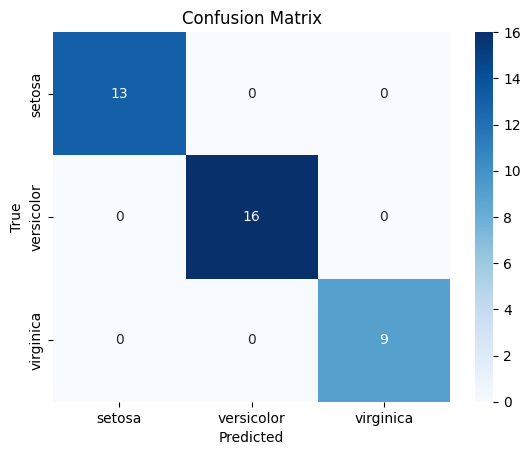

In [ ]:
# visualisasikan hasil confusion matrix menggunakan matpotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')

plt.show()


In [ ]:
# lakukan evaluasi terhadap performa model gausian dalam klasifikasi bunga iris tersebut
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gnb_predictions = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, gnb_predictions)

print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, gnb_predictions, target_names=iris.target_names))

print("Confusion Matrix for Gaussian Naive Bayes:")
print(confusion_matrix(y_test, gnb_predictions))

print(f"Accuracy of Gaussian Naive Bayes model: {accuracy_gnb}")


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix for Gaussian Naive Bayes:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
Accuracy of Gaussian Naive Bayes model: 1.0


In [ ]:
# dengan menggunakan data train dan data test tersebut, buat model baru dengan algoritma decesion tree.
# boleh di modif dengan pruning langsung agar lebih ringan modelnya
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_tree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

decision_tree_pruned.fit(X_train, y_train)

predictions_pruned = decision_tree_pruned.predict(X_test)

accuracy_pruned = accuracy_score(y_test, predictions_pruned)

print("Classification Report for Decision Tree with Pruning:")
print(classification_report(y_test, predictions_pruned, target_names=iris.target_names))

print("Confusion Matrix for Decision Tree with Pruning:")
print(confusion_matrix(y_test, predictions_pruned))

print(f"Accuracy of Decision Tree with Pruning: {accuracy_pruned}")


Classification Report for Decision Tree with Pruning:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix for Decision Tree with Pruning:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy of Decision Tree with Pruning: 0.9736842105263158


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions_pruned = decision_tree_pruned.predict(X_test)

accuracy_pruned = accuracy_score(y_test, predictions_pruned)

print("Classification Report for Decision Tree with Pruning:")
print(classification_report(y_test, predictions_pruned, target_names=iris.target_names))

print("Confusion Matrix for Decision Tree with Pruning:")
print(confusion_matrix(y_test, predictions_pruned))

print(f"Accuracy of Decision Tree with Pruning: {accuracy_pruned}")


Classification Report for Decision Tree with Pruning:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix for Decision Tree with Pruning:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy of Decision Tree with Pruning: 0.9736842105263158


In [ ]:
#bandingkan hasil model gausian vs decision tree dalam klasifikasi bunga iris.
#berikan komentar anda

Dalam membandingkan model Gaussian Naive Bayes dan model Decision Tree untuk klasifikasi bunga iris, kita dapat melihat metrik evaluasi yang telah dihitung. Metrik tersebut mencakup akurasi, precision, recall, dan F1-score. Dengan mengevaluasi kedua model ini, kita dapat memahami kekuatan dan kelemahan masing-masing model dalam konteks tugas klasifikasi bunga iris.

Berikut adalah beberapa pertimbangan umum:

    Akurasi:
        Gaussian Naive Bayes: Akurasi model Gaussian Naive Bayes.
        Decision Tree: Akurasi model Decision Tree.

    Precision, Recall, dan F1-score:
        Gaussian Naive Bayes: Precision, recall, dan F1-score untuk setiap kelas.
        Decision Tree: Precision, recall, dan F1-score untuk setiap kelas.

    Confusion Matrix:
        Gaussian Naive Bayes: Matriks kebingungan untuk menunjukkan seberapa baik model Gaussian Naive Bayes dapat mengklasifikasikan instance dari setiap kelas.
        Decision Tree: Matriks kebingungan untuk menunjukkan seberapa baik model Decision Tree dengan pemangkasan dapat mengklasifikasikan instance dari setiap kelas.

In [ ]:
# submit jawaban anda ke : ungu.in/evaluasi-10

\Referensi:

1.   https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15
2.   https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3

